<a href="https://colab.research.google.com/github/miguel-fc/PyTorch-tools/blob/main/nr_RF_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Python related required packages
import gdown
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

In [2]:
#Set up these important parameters
ldim = 3
nlabels = 3

In [3]:
!gdown "https://drive.google.com/uc?id=1-6dVAhChOpv8vD-7ZttTVo8qO7ffXiw8"

Downloading...
From: https://drive.google.com/uc?id=1-6dVAhChOpv8vD-7ZttTVo8qO7ffXiw8
To: /content/df_encoded_samples.pkl
100% 500k/500k [00:00<00:00, 82.6MB/s]


In [4]:
#Convert the database into a pandas dataframe
df = pd.read_pickle('df_encoded_samples.pkl')

In [5]:
df

,l1,l2,l3,label0,label1,label2
0,-2.407824,-4.594586,3.573585,0.155,0.0283,-0.48025
1,0.547179,-0.264250,5.539307,0.0798,-0.398,-0.53493
2,-5.763701,-0.795475,2.473191,0.162,0.555,0.57512
3,-2.745560,3.627307,4.480858,0.141,-0.361,0.04991
4,-5.761560,-0.792242,2.474182,0.122,0.36,0.34467
...,...,...,...,...,...,...
4748,-5.695157,-0.828391,2.499455,0.106,0.139,0.56944
4749,-5.759346,-0.822867,2.470292,0.118,0.0867,0.34004
4750,0.551289,-0.301864,5.533068,0.0703,-0.291,-0.5284
4751,0.867953,-0.220036,5.669721,0.122,-0.234,-0.40674


In [6]:
def run_rf(data,ldim,in_label):
  #Analyzing individual labels.

  label = in_label
  ld = ldim

#Creating the X database according to data and the dimension of the latent space
  vars = []
  for i in range(ld):
    var = 'l' + str(i+1)
    vars.append(var)

  X = df[vars]
  y = df[label]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=134)

  #Searching for the best rf
  ## Define Grid 
  grid = { 
      'n_estimators': [200,300,400],
      'max_features': ['sqrt','log2'],
      'max_depth' : [3,4,5],
      'random_state' : [18]
  }

  rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
  rf.fit(X_train, y_train)

  # print(rf.best_estimator_)
  # print(rf.best_score_)

  #Fit the best random forest for this label
  # n_rf = RandomForestRegressor(n_estimators = 400, max_depth=3, max_features='sqrt',random_state=18)
  n_rf = rf.best_estimator_
  n_rf.fit(X_train,y_train)

  #Predict labels with the best forest
  y_pred_label = n_rf.predict(X_test)
  print('R^2({}) = '.format(label), n_rf.score(X_test, y_test)*100.0)

  # Plot to compare original and predicted labels 
  # and the feature importance
  fig = plt.figure(figsize=(20, 10))
  ax = fig.add_subplot(1,2,1)
  ax.scatter(y_test,y_pred_label)
  ax.set_xlabel('Actual {}'.format(label))
  ax.set_ylabel('Predicted {}'.format(label))

  ax = fig.add_subplot(1,2,2)
  plt.barh(X_train.columns.values,n_rf.feature_importances_)
  ax.set_xlabel("Random Forest Feature Importance")
  ax.set_title(label)

  plt.show()

  return


R^2(label0) =  69.7789711230711


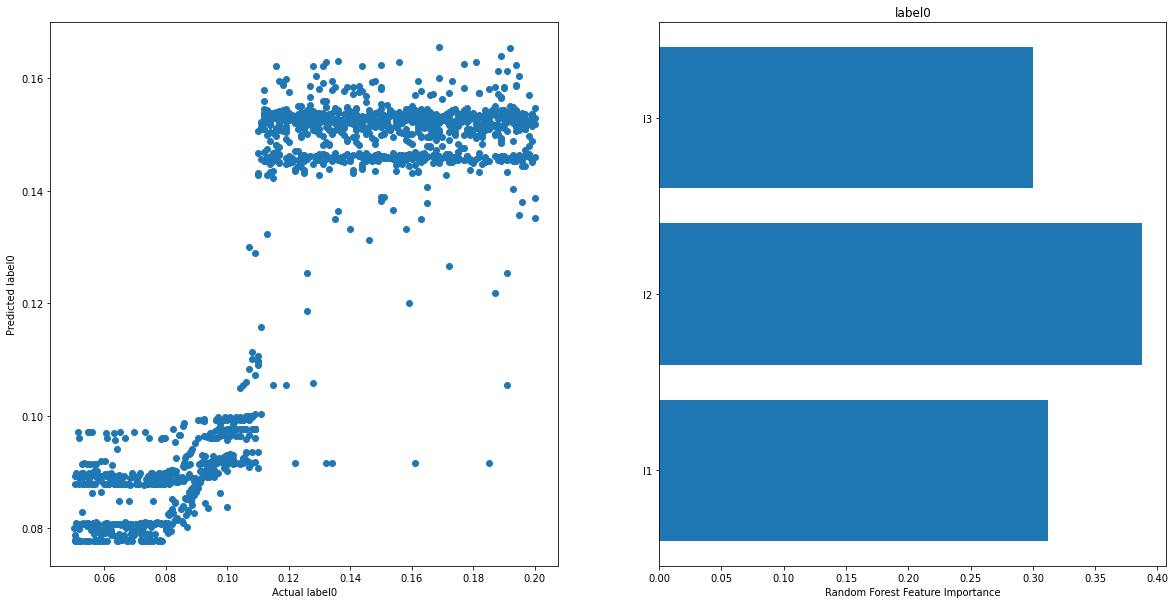

R^2(label1) =  88.2983225427543


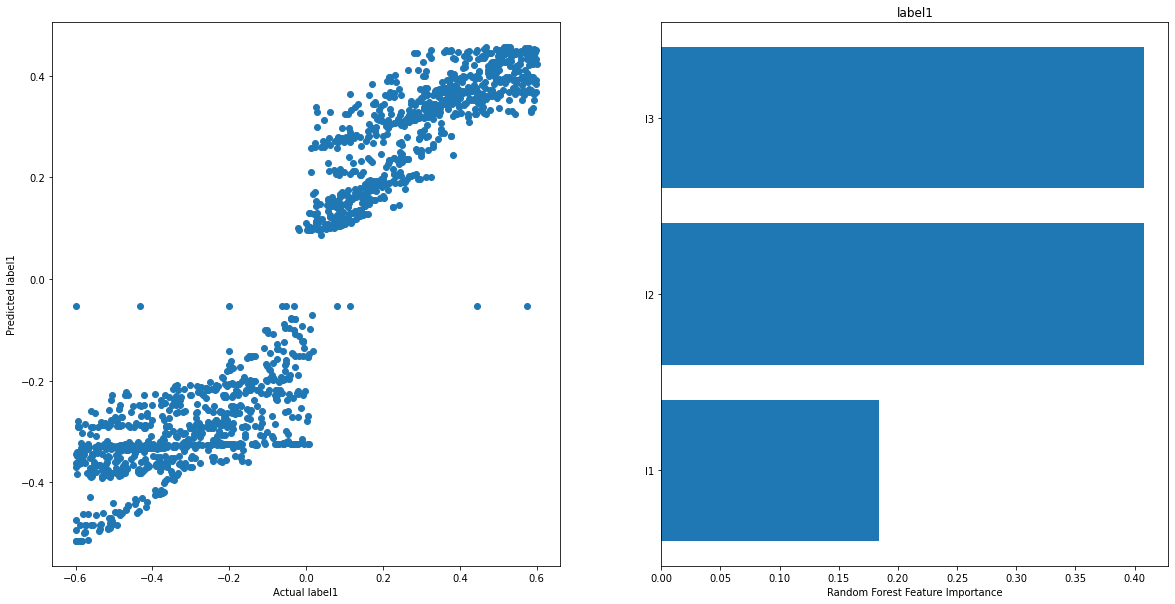

R^2(label2) =  88.57954080149742


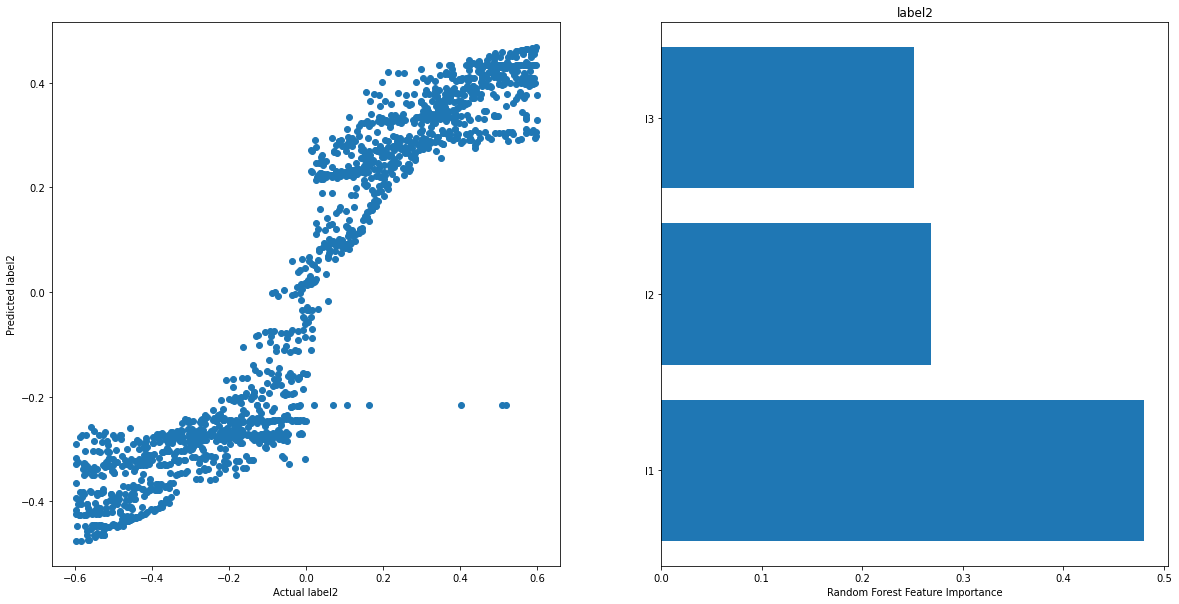

In [7]:
#Input here the name of the dataframe and the
#dimension of the latent space and the number
#of labels 

data = df

#Running the random forest for each label
for i in range(nlabels):
  label = 'label'+str(i)
  # print(label)
  run_rf(data,ldim,label)
